In [26]:
import matplotlib.pyplot as plt

In [27]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

from data import loader, load_preprocessing
from knn_classifier import knn

import distances
import hott
import numpy as np
# Download datasets used by Kusner et al from
# https://www.dropbox.com/sh/nf532hddgdt68ix/AABGLUiPRyXv6UL2YAcHmAFqa?dl=0
# and put them into
data_path = './data/'

# Download GloVe 6B tokens, 300d word embeddings from
# https://nlp.stanford.edu/projects/glove/
# and put them into
embeddings_path = './data/glove.6B/glove.6B.300d.txt'

# Pick a dataset (uncomment the line you want)
data_name1 = 'bbcsport-emd_tr_te_splitdict70.pkl'
data_name2 = 'twitter-emd_tr_te_splitdict70.pkl'
data_name3 = 'classic-emd_tr_te_splitdict70.pkl'
data_name4 = 'ohsumed-emd_tr_te_ixdict70.pkl'
data_name5 = 'r8-emd_tr_te3dict70.pkl'

data1 = load_preprocessing(data_path + data_name1)
data2 = load_preprocessing(data_path + data_name2)
data3 = load_preprocessing(data_path + data_name3)
data4 = load_preprocessing(data_path + data_name4)
data5 = load_preprocessing(data_path + data_name5)
X_Bow1 = data1['X']
X_Bow2 = data2['X']
X_Bow3 = data3['X']
X_Bow4 = data4['X']
X_Bow5 = data5['X']

#### Zipf Law

In [28]:
l1 = X_Bow1.sum(axis = 0)
l2 = X_Bow2.sum(axis = 0)
l3 = X_Bow3.sum(axis = 0)
l4 = X_Bow4.sum(axis = 0)
l5 = X_Bow5.sum(axis = 0)

In [29]:
l1 = l1/(l1.sum())
l2 = l2/(l2.sum())
l3 = l3/(l3.sum())
l4 = l4/(l4.sum())
l5 = l5/(l5.sum())

In [33]:
lRank1 = np.flip(np.sort(l1), label = "bbcsport")
lRank2 = np.flip(np.sort(l2), label = "twitter")
lRank3 = np.flip(np.sort(l3), label = "classic")
lRank4 = np.flip(np.sort(l4), label = "ohsumed")
lRank5 = np.flip(np.sort(l5), label = "r8")

TypeError: _flip_dispatcher() got an unexpected keyword argument 'label'

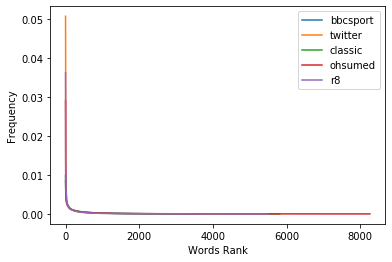

In [42]:
plt.plot((range(lRank1.shape[0])),(lRank1), label = "bbcsport") # plotting t, a separately 
plt.plot((range(lRank2.shape[0])),(lRank2), label = "twitter") # plotting t, b separately 
plt.plot((range(lRank3.shape[0])),(lRank3), label = "classic") # plotting t, c separately 
plt.plot((range(lRank4.shape[0])),(lRank4), label = "ohsumed") # plotting t, c separately 
plt.plot((range(lRank5.shape[0])),(lRank5), label = "r8") # plotting t, c separately
plt.xlabel("Words Rank")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("FrequencyStat.png", dpi=1200)
plt.show()

c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


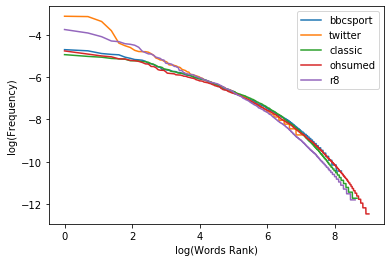

In [43]:
plt.plot(np.log(range(lRank1.shape[0])),np.log(lRank1), label = "bbcsport") # plotting t, a separately 
plt.plot(np.log(range(lRank2.shape[0])),np.log(lRank2), label = "twitter") # plotting t, b separately 
plt.plot(np.log(range(lRank3.shape[0])),np.log(lRank3), label = "classic") # plotting t, c separately 
plt.plot(np.log(range(lRank4.shape[0])),np.log(lRank4), label = "ohsumed") # plotting t, c separately 
plt.plot(np.log(range(lRank5.shape[0])),np.log(lRank5), label = "r8") # plotting t, c separately
plt.xlabel("log(Words Rank)")
plt.ylabel("log(Frequency)")
plt.legend()
plt.savefig("LogFrequencyStat.png", dpi=1200)
plt.show()

#### Topic Truncation

In [44]:
topic_proportions1 = data1['proportions']
topic_proportions2 = data2['proportions']
topic_proportions3 = data3['proportions']
topic_proportions4 = data4['proportions']
topic_proportions5 = data5['proportions']

In [58]:
topic_mean1, topic_std1 = np.mean(np.flip(np.sort(topic_proportions1, axis = 1)), axis = 0), np.std(np.flip(np.sort(topic_proportions1, axis = 1)), axis = 0)
topic_mean2, topic_std2  = np.mean(np.flip(np.sort(topic_proportions2, axis = 1)), axis = 0), np.std(np.flip(np.sort(topic_proportions2, axis = 1)), axis = 0)
topic_mean3, topic_std3 = np.mean(np.flip(np.sort(topic_proportions3, axis = 1)), axis = 0), np.std(np.flip(np.sort(topic_proportions3, axis = 1)), axis = 0)
topic_mean4, topic_std4  = np.mean(np.flip(np.sort(topic_proportions4, axis = 1)), axis = 0), np.std(np.flip(np.sort(topic_proportions4, axis = 1)), axis = 0)
topic_mean5, topic_std5  = np.mean(np.flip(np.sort(topic_proportions5, axis = 1)), axis = 0), np.std(np.flip(np.sort(topic_proportions5, axis = 1)), axis = 0)

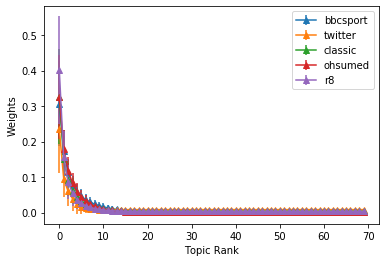

In [63]:
plt.errorbar(range(topic_mean1.shape[0]),topic_mean1, topic_std1, marker='^', label = "bbcsport")
plt.errorbar(range(topic_mean2.shape[0]),topic_mean2, topic_std2, marker='^', label = "twitter")
plt.errorbar(range(topic_mean3.shape[0]),topic_mean3, topic_std3, marker='^', label = "classic")
plt.errorbar(range(topic_mean4.shape[0]),topic_mean4, topic_std4, marker='^', label = "ohsumed")
plt.errorbar(range(topic_mean5.shape[0]),topic_mean5, topic_std5, marker='^', label = "r8")
plt.xlabel("Topic Rank")
plt.ylabel("Weights")
plt.legend()
plt.savefig("TopicStat.png", dpi=1200)
plt.show()

c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


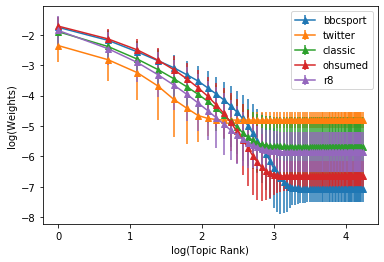

In [65]:
plt.errorbar(np.log(range(topic_mean1.shape[0])),np.log(topic_mean1), topic_std1/topic_mean1, marker='^', label = "bbcsport")
plt.errorbar(np.log(range(topic_mean2.shape[0])),np.log(topic_mean2), topic_std2/topic_mean2, marker='^', label = "twitter")
plt.errorbar(np.log(range(topic_mean3.shape[0])),np.log(topic_mean3), topic_std3/topic_mean3, marker='^', label = "classic")
plt.errorbar(np.log(range(topic_mean4.shape[0])),np.log(topic_mean4), topic_std4/topic_mean4, marker='^', label = "ohsumed")
plt.errorbar(np.log(range(topic_mean5.shape[0])),np.log(topic_mean5), topic_std5/topic_mean5, marker='^', label = "r8")
plt.xlabel("log(Topic Rank)")
plt.ylabel("log(Weights)")
plt.legend()
plt.savefig("logTopicStat.png", dpi=1200)
plt.show()